# In-Class Activity: Polynomial Regression
## ECE 204 Data Science & Engineering

### Lecture Notes

### Import Statements

In [40]:
# Add any import statements you need to complete the activity here!
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np



### User-defined Functions

In [41]:
def make_observations(x, sigma=0.1, seed=42):
    np.random.seed(seed)
    noise = sigma * np.random.randn(len(x))
    y = 1 - np.exp(-x**2) + noise
    return y

def polynomial_features(x, max_degree):
    return pd.DataFrame( { i: x ** i for i in range(max_degree+1) } )


### In-Class Activity
#### Please first read the questions in the in-class activity, where the questions are there in detail. This is just a starter notebook.

Let's test the goal of machine learning: **to predict well on *unseen* data.** We only trained on input in a certain range and validated off that input too. But how well does it perform on a completely new value? Let's test on unseen data, or polynomial inputs in a *slightly* broader range.

---
**Problem 1.**
Fit a polynomial with degree 2 to the following training data.

Test this polynomial on the provided test data. **How well does it predict for $x$ values in [3, 4]?**

* The prediction is relatively close to the testing data in [3, 4].
* It does not predict well in [3, 4]. The prediction increases while the testing data stays flat.
* It does not predict well in [3, 4]. The prediction decreases while the testing data stays increases.

In [42]:
x_train = np.linspace(-2, 2, num=100)
y_train = make_observations(x_train)

x_test = np.linspace(-4, 4, num=100)
y_test = make_observations(x_test)

d = 2

X_test = polynomial_features(x_test, max_degree=d)
X_train = polynomial_features(x_train, max_degree=d)

In [43]:
# Your code here. Use the X_train and X_test defined in the cell above!
from sklearn.linear_model import LinearRegression

# note: we don't need to use an "intercept" term because this is the same thing as using a
# polynomial of degree zero, which we have included in our list of features!
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Axes: xlabel='x_test'>

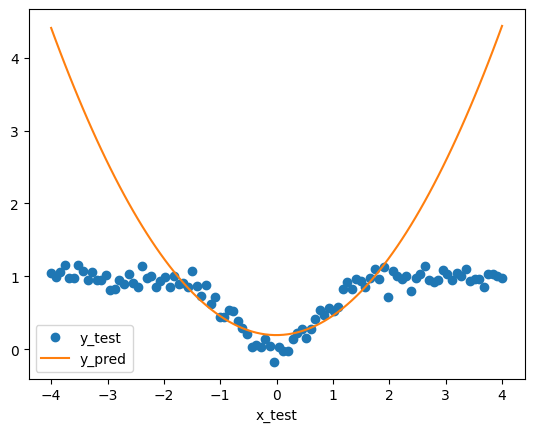

In [44]:
# Define y_pred above as the predictions on X_test
show = pd.DataFrame({"y_pred": y_pred, "x_test": x_test, "y_test": y_test})

ax = show.plot(x="x_test", y="y_test", style="o")
show.plot(x="x_test", y="y_pred", style="-", ax=ax)

---
**Problem 2.**
What is the residual sum of squares (RSS) for the train data? Use the setup above; the degree and train data will remain the same.

In [48]:
# Your code here
y_train_pred = model.predict(X_train)
np.sum((y_train - y_train_pred)** 2)

2.5553217194953333

---
**Problem 3.**
What is the residual sum of squares (RSS) for the test data? Use the setup above; the degree, train data and test data will remain the same.

In [49]:
# Your code here
y_test_pred = model.predict(X_test)
np.sum((y_test - y_test_pred)** 2)

192.29118519993418